# Analyzing PER for the league 


### Step 1: Clean
* Here, we are going to split the player column after the comma and add another column for 'team'
* After that, we'll take a look at some key players to get some intial insights on PER across all teams

In [1]:
import pandas as pd
import numpy as np
import os

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("../data/processed/per_21_22.csv")
df.head()

,rk,player,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,team
0,1.0,Ahmad Caver,1,1.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,78.83,1.0,0.0,IND
1,2.0,Sekou Doumbouya,2,8.0,0.717,0.0,17.0,0.0,0.0,0.0,0.0,41.23,0.0,0.0,LAL
2,3.0,Joe Johnson,1,2.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,39.82,0.9,0.0,BOS
3,4.0,Nikola Jokic,48,32.9,0.662,25.4,11.7,0.0,0.0,0.0,0.0,33.21,533.1,17.8,DEN
4,5.0,Giannis Antetokounmpo,47,32.5,0.623,18.5,10.2,0.0,0.0,0.0,0.0,32.16,0.0,0.0,MIL


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.shape

(591, 15)

### Let's take a look at some key players

In [4]:
df[df.player == 'LeBron James']

,rk,player,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,team
10,11.0,LeBron James,39,36.7,0.62,19.5,9.6,0.0,0.0,0.0,0.0,27.1,0.0,0.0,LAL


In [5]:
df[df.player.str.contains('Curry')]

,rk,player,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,team
37,38.0,Stephen Curry,51,34.7,0.590,20.3,10.4,0.0,0.0,0.0,0.0,21.92,0.0,0.0,GS
253,NaN,Seth Curry,45,34.8,0.603,21.9,10.2,0.0,0.0,0.0,0.0,13.83,0.0,0.0,PHI


In [6]:
df[df.player == 'Ja Morant']

,rk,player,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,team
19,20.0,Ja Morant,44,33.1,0.572,20.4,10.4,0.0,0.0,0.0,0.0,25.08,0.0,0.0,MEM


And, of course, the focus of this study: 

In [7]:
df[df.player == 'Trae Young']

,rk,player,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,team
20,21.0,Trae Young,49,34.5,0.591,25.2,11.2,0.0,0.0,0.0,0.0,25.04,0.0,0.0,ATL


### Now let's look at the players with the highest and lowest PER

In [8]:
df.per.sort_values()
# We can see that the lowest PER in the group is -45.6

df[df.per == -45.60]

,rk,player,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,team
590,591.0,Nate Hinton,2,1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,-45.6,0.0,0.0,IND


Unsurprisingly, we find its the player ranked lowest in the NBA, Nate Hinton.

**Note:** This isn't really fair to Hinton. He signed a exhibit deal with the Indiana Pacers in Sept. 2021. After the deal ended, he joined the Pacers' G-league team, the Fort Wayne Mad Ants (go Ants!). After performing fairly well with the Ants, Hinton was signed again by the Pacers for a 10-day contract in December. After that deal came to a close, Hinton went back to the Ants. [Source]('https://en.wikipedia.org/wiki/Nate_Hinton#Indiana_Pacers_(2021%E2%80%932022)')

In other words, we're not really going to count Hinton as our "minimum PER," given he's not even playing in the league right now!


In [9]:
df.per.sort_values(ascending=False)
# The highest PER is 78.83

0      78.83
1      41.23
2      39.82
3      33.21
4      32.16
       ...  
586   -20.33
587   -20.71
588   -22.39
589   -23.65
590   -45.60
Name: per, Length: 591, dtype: float64

In [10]:
df[df.per == 78.83]

,rk,player,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,team
0,1.0,Ahmad Caver,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,78.83,1.0,0.0,IND


Our highest ranked player is Ahmad Caver!! Of the...Indiana Pacers?

**Wrong again.** Carver also plays for the G-leauge. He signed a 10-day contract with the Pacers in Dec. 2021 before rejoining the Memphis Hustle, where he still plays today. [source]('https://en.wikipedia.org/wiki/Ahmad_Caver#Indiana_Pacers_(2021%E2%80%932022)')

The outbreak of the Omicron variant of Covid-19 in the U.S. forced a lot of NBA teams to call up G-leauge players, which they were allowed to do under the [hardship excemption]('https://www.sportingnews.com/us/nba/news/hardship-exception-nba-rule-explained-covid-injury/tgyct2lopr101v6narm4p08qj') rules. No disrespect to these incredible players who rose to the occassion, but they are not going to be part of our analysis!

### Note to self/Soma: Honestly didn't consider this^ until this very moment! I will be going back into my ETL folder later and making another CSV with only qualified players. My final project will just have a line or two explaining why they qualified, but I'm leaving the above for now!

# Let's look at the Hawks!

In [11]:
hawks = df[df.team == ' ATL']

In [12]:
hawks

,rk,player,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,team
20,21.0,Trae Young,49,34.5,0.591,25.2,11.2,0.0,0.0,0.0,0.0,25.04,0.0,0.0,ATL
39,40.0,Cameron Oliver,2,21.5,0.705,15.5,0.0,0.0,0.0,0.0,0.0,21.88,7.1,0.2,ATL
52,53.0,Clint Capela,46,28.2,0.573,12.5,4.7,0.0,0.0,0.0,0.0,21.05,201.9,6.7,ATL
64,65.0,John Collins,49,31.5,0.626,11.4,6.6,0.0,0.0,0.0,0.0,20.21,0.0,0.0,ATL
68,NaN,Onyeka Okongwu,22,22.1,0.750,12.8,13.9,0.0,0.0,0.0,0.0,20.09,0.0,0.0,ATL
131,132.0,Gorgui Dieng,35,9.2,0.613,18.9,12.8,0.0,0.0,0.0,0.0,16.78,29.8,1.0,ATL
221,222.0,Danilo Gallinari,43,23.2,0.585,13.2,5.6,0.0,0.0,0.0,0.0,14.43,0.0,0.0,ATL
236,NaN,Skylar Mays,21,9.4,0.610,18.2,9.1,0.0,0.0,0.0,0.0,14.09,0.0,0.0,ATL
263,264.0,Lou Williams,37,14.6,0.512,20.8,8.2,0.0,0.0,0.0,0.0,13.61,0.0,0.0,ATL
278,NaN,Delon Wright,49,18.2,0.554,35.9,9.5,0.0,0.0,0.0,0.0,13.24,0.0,0.0,ATL


### This might be helpful:
[SOURCE]('http://insider.espn.com/nba/hollinger/statistics/_/page/2')
* gp = games played
* mpg = minutes per game
* TS%: True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]
* AST: Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]
* TO: Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]
* USG: Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)
* ORR: Offensive rebound rate
* DRR: Defensive rebound rate
* REBR: Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]
* PER: Player Efficiency Rating is the overall rating of a player's per-minute statistical production. The league average is 15.00 every season.
* VA: Value Added - the estimated number of points a player adds to a teamâ€™s season total above what a 'replacement player' (for instance, the 12th man on the roster) would produce. Value Added = ([Minutes * (PER - PRL)] / 67). PRL (Position Replacement Level) = 11.5 for power forwards, 11.0 for point guards, 10.6 for centers, 10.5 for shooting guards and small forwards
* EWA: Estimated Wins Added - Value Added divided by 30, giving the estimated number of wins a player adds to a teamâ€™s season total above what a 'replacement player' would produce.
* Player Efficiency Rating (PER) League average: 15.0

### Sorting the Hawks by highest PER

In [13]:
hawks.sort_values(by='per', ascending=False)

# We can see that Young has the highest efficiency
# Cameron Oliver was a G-league player brought in, and man was he efficient! 
# Next is Clint Capela, then John Collins, Onyeka Okongwu, Gorguri Dieng, and so on

,rk,player,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,team
20,21.0,Trae Young,49,34.5,0.591,25.2,11.2,0.0,0.0,0.0,0.0,25.04,0.0,0.0,ATL
39,40.0,Cameron Oliver,2,21.5,0.705,15.5,0.0,0.0,0.0,0.0,0.0,21.88,7.1,0.2,ATL
52,53.0,Clint Capela,46,28.2,0.573,12.5,4.7,0.0,0.0,0.0,0.0,21.05,201.9,6.7,ATL
64,65.0,John Collins,49,31.5,0.626,11.4,6.6,0.0,0.0,0.0,0.0,20.21,0.0,0.0,ATL
68,NaN,Onyeka Okongwu,22,22.1,0.750,12.8,13.9,0.0,0.0,0.0,0.0,20.09,0.0,0.0,ATL
131,132.0,Gorgui Dieng,35,9.2,0.613,18.9,12.8,0.0,0.0,0.0,0.0,16.78,29.8,1.0,ATL
221,222.0,Danilo Gallinari,43,23.2,0.585,13.2,5.6,0.0,0.0,0.0,0.0,14.43,0.0,0.0,ATL
236,NaN,Skylar Mays,21,9.4,0.610,18.2,9.1,0.0,0.0,0.0,0.0,14.09,0.0,0.0,ATL
263,264.0,Lou Williams,37,14.6,0.512,20.8,8.2,0.0,0.0,0.0,0.0,13.61,0.0,0.0,ATL
278,NaN,Delon Wright,49,18.2,0.554,35.9,9.5,0.0,0.0,0.0,0.0,13.24,0.0,0.0,ATL


### Surprises so far: 
* Lou Williams (higher than expected)
* Bogdan Bogdanovic (lower than expected, but then again, he hasn't had the best season so far)
* Kevin Huerter (lower than expected, come on Red Velvet!) 
* De'Andre Hunter (lower than expected)
* Solomon Hill (lower than expected, but...he hasn't had a ton of playing time so far this season)

### Next steps: 
Given we have a few surprises, this gives us even more reason to see who performs better when they play with Young. To do that, we are going to use NBA.com's [lineups]('https://www.nba.com/stats/lineups/traditional/?Season=2021-22&SeasonType=Regular%20Season&TeamID=1610612737') by testing 2-player, 3-player and 5-player line-ups WITH Young and WITHOUT Young to see how they stack up against each other (**NOTE:** This will still take some more scraping, and NBA.com is quite protective of it's data these days, since it doesn't want people to create all these beautiful visualizations and such without it's consent. But I'm fairly confident I can get by them—this is in the works!). 

For now, I'm interested in understanding individual Hawks more and seeing how the Hawks' best partnership stack up against others in the NBA. 

# "I want people to say that I'm something new, something different. Something they've never seen before." - Trae Young 🧊🧊🧊

In [14]:
df[df.player == 'Trae Young']['ts%']

20    0.591
Name: ts%, dtype: float64

In [15]:
df[df.player == 'LeBron James']['ts%']

10    0.62
Name: ts%, dtype: float64

In [16]:
df[df.player == 'Stephen Curry']['ts%']

37    0.59
Name: ts%, dtype: float64

In [17]:
df[df.player == 'Seth Curry']['ts%']

253    0.603
Name: ts%, dtype: float64

In [18]:
df[df.player == 'Grayson Allen']['ts%']
# kills me to include him but here we are

276    0.582
Name: ts%, dtype: float64

In [19]:
df[df.player == 'Mike Conley']['ts%']

90    0.594
Name: ts%, dtype: float64

In [20]:
df[df.player == 'Patty Mills']['ts%']

299    0.592
Name: ts%, dtype: float64

In [21]:
# Here are our league shooters + LeBron

df_shooters = df[(df.player == 'Patty Mills') | (df.player == 'Trae Young') | (df.player == 'Mike Conley') | \
  (df.player == 'Grayson Allen') | (df.player == 'Seth Curry') | (df.player == 'Stephen Curry') | \
  (df.player == 'LeBron James')]

In [45]:
#df_shooters.to_csv('top_shooters.csv', index=False)

<AxesSubplot:>

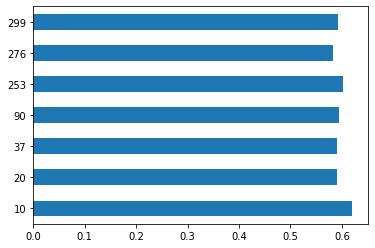

In [22]:
df_shooters['ts%'].plot(kind='barh')

**WOW!** this is ugly. Here we need to switch out rankings for names, get some annotations going, just so many other things. Maybe let's try ggplot? 

# Plotnine

In [28]:
from plotnine import *

# The column name 'ts%' I think is going to continue to be a problem, so let's take care of that: 
df_shooters.rename(columns = {'ts%':'true_shooting_per'}, inplace = True)

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
df_shooters.head()

,rk,player,gp,mpg,true_shooting_per,ast,to,usg,orr,drr,rebr,per,va,ewa,team
10,11.0,LeBron James,39,36.7,0.620,19.5,9.6,0.0,0.0,0.0,0.0,27.10,0.0,0.0,LAL
20,21.0,Trae Young,49,34.5,0.591,25.2,11.2,0.0,0.0,0.0,0.0,25.04,0.0,0.0,ATL
37,38.0,Stephen Curry,51,34.7,0.590,20.3,10.4,0.0,0.0,0.0,0.0,21.92,0.0,0.0,GS
90,91.0,Mike Conley,49,28.5,0.594,27.5,8.9,0.0,0.0,0.0,0.0,18.50,0.0,0.0,UTAH
253,NaN,Seth Curry,45,34.8,0.603,21.9,10.2,0.0,0.0,0.0,0.0,13.83,0.0,0.0,PHI


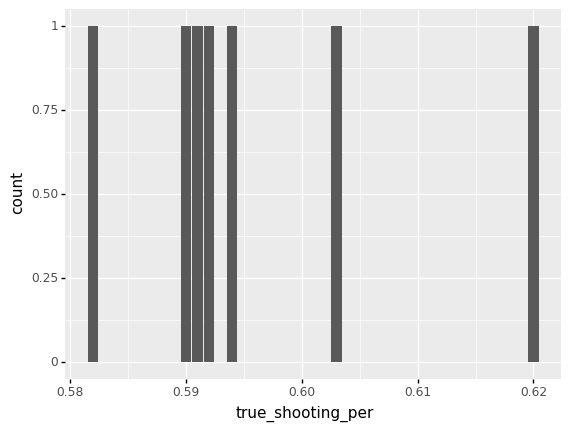

<ggplot: (304574474)>

In [44]:
(
    ggplot(df_shooters,
          aes('true_shooting_per'))
    + geom_bar()
#     + labs(
#         title = "put a title here",
#         y = "True Shooting Percentage",
#         x = "players"
#         )
)


Yuck! Honestly...not entirely sure how to nail that down, but I'm going to have to learn for this project! That'll happen...soon! 😬

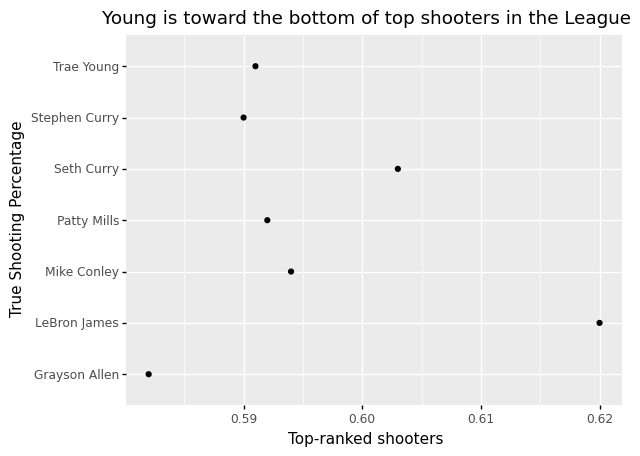

<ggplot: (304295438)>

In [38]:
(
    ggplot(df_shooters,
          aes('true_shooting_per', 'player'))
    + geom_point()
    + labs(
        title = "Young is toward the bottom of top shooters in the League",
        y = "True Shooting Percentage",
        x = "Top-ranked shooters"
        )
)

# Immediate Next Steps: 
1. Scrape all necessary tables from NBA.com (I will need at least 3, but could be up to...many more, if I'm able to do this efficiently) --> store in CSVs and then use for analysis
2. Practice/figure out plotnine bar graphs for analysis
3. Move some plotnine bar graphs into DataWrapper, both for practice and to see if I can make them prettier